# PC 3 : Intégration numérique, méthodes de quadrature

**<big> Préparation avant la PC :</big>**

**La question 1 des exercices 1 et 2 sont à préparer** avant la séance de PC.

**<big><font color=black><span style="background-color:deepskyblue">Bonus</span></font> après la PC :</big>** 

**Les exercices 1 et 2 contiennent des questions d'implémentation (en bleu) qui peuvent être rendues pour obtenir un <font color=black><span style="background-color:deepskyblue">bonus</span></font> sur la note finale**.

In [4]:
# Ce package permet de travailler efficacement avec des tableaux
import numpy as np

# Ce package permet de faire des sorties graphiques
from matplotlib import pyplot as plt

# La fonction scipy.integrate.quad donne une approximation d'une integrale par une formule de quadrature
# on l'utilise ici comme une boite noire
from scipy.integrate import quad
# La fonction p_roots permet de calculer les points et poids de la quadrature de Gauss-Legendre
from scipy.special import p_roots
# La fonction scipy.special.sici est utilisee a l'exercice 1
from scipy.special import sici

---

## Exercice 1 : Autour de la méthode des trapèzes

>Dans cet exercice, on considère une fonction continue $f:[a,b]\to\mathbb{R}$, et on note $\left\Vert f\right\Vert_{\infty}=\max\limits_{x\in[a,b]}\left\vert f(x)\right\vert$. Étant donné un entier $n$ strictement positif, on note $a=a_0<a_1<\ldots<a_n=b$ la subdivision régulière de l'intervalle $[a,b]$ donnée par
>
>$$ a_k = a + k\frac{b-a}{n} \qquad{} \forall~k\in\{0,\ldots,n\}, $$
>
>et $I_n(f)$ l'intégrale approchée de $f$ entre $a$ et $b$ calculée à l'aide de la méthode des trapèzes :
>
>$$ I_n(f) = \frac{b-a}{n}\left(\sum_{k=0}^n f(a_k)-\frac{f(a)+f(b)}{2}\right).$$

### Question 1 : Première estimation d'erreur.  

On suppose dans cette question que $f$ est de classe $\mathcal{C}^2$.

1) Soient $x,y\in[a,b]$, $x<y$. Montrer que 

$$ \left\vert \int_x^y f(t) dt - (y-x)\frac{f(x)+f(y)}{2}\right\vert \leq \frac{(y-x)^3}{12} \left\Vert f'' \right\Vert_\infty. $$

*Indication :* On pourra utiliser une estimation d'erreur entre $f$ et son polynôme d'interpolation de Lagrange.

$$\| f - p_n(f)\| _\infty \leq \frac{\| \Pi_{n+1} \|_\infty}{(n+1)!}\| f^{(n+1) \|_\infty}$$

$n = 1$:

$$(y - x) \frac{f(x) + f(y)}{2} = \int\limits_x^y p_1(f)(t)dt$$

$$p_1(f)(t) = f(x) + \frac{t - x}{y - x}(f(y) - f(x))$$

$$\left| \int\limits _x^y (f- p_1(f))(t) dt\right| \leq \frac{(y-x)^3}{2}\|f''\|_\infty$$

Pas assez précis, mais:

$$\forall t \in [x, y], \exists \xi t.q.\;f(t) - p_n(f)(t) = \frac{\Pi_{n+1}(t) }{(n+1)!} f^{(n+1)}(\xi)$$

$$\left| \int\limits _x^y (f- p_1(f))(t) dt\right| \leq \left\| \frac{\Pi_{n+1} }{(n+1)!} f^{(n+1)} \right\|_\infty$$

2) En déduire que 

$$ \left\vert \int_a^b f(t) dt - I_n(f) \right\vert \leq \frac{(b-a)^3}{12 n^2} \left\Vert f'' \right\Vert_\infty. $$



$x = a_n$, $y = a_{n+1}$

$$\left | \int\limits_a^b f - I_n(f) \right  | = \left | \sum\limits_{k = 0} ^{n-1} \left(\int\limits_{a_k} ^{a_{k+1}} f - (a_{k+1} - a_{k})\frac{f(a_{k+1} + f(a_k))}{2}  \right) \right|  \leq  \sum\limits_{k = 0} ^{n-1} \left(\int\limits_{k = 0} ^{n-1} \frac{1}{12}\left(\frac{b-a}{n}\right)^3 \|f''\|_\infty  \right) \leq \frac{(b-a)^3}{12n^2} \|f''\|_\infty$$

3) **<font color=black><span style="background-color:deepskyblue">Bonus : </span></font>**

a) Implémenter la méthode des trapèzes :
- Construire une fonction qui renvoie $I_n(f)$.
- *Vérifier que votre algorithme renvoie bien la valeur escomptée en intégrant $f(x)=x$ sur $[0,1]$ pour $n=2,3,4$.* 

b) Tester la convergence de la méthode avec la fonction $u : t \mapsto t^3 \ln t$ sur $[1,2]$ : 
- Utiliser ensuite votre algorithme pour calculer de manière approchée l'intégrale de $u : t \mapsto t^3 \ln t$ entre $1$ et $2$. Comparer avec la valeur donnée par la fonction *quad* de *scipy* (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html).
- Tracer en échelle log-log sur le même graphe $\left|\int_a^b f - I_n(f)\right|$ (où $\int_a^b f$ est approché avec *quad* de *scipy*) et $1/n^2$ en fonction de $n$, pour $n = 2, 2^2, ..., 2^{16}$.

In [5]:
def my_trapeze(f, a, b, n):
    """
    calcule l'approximation de l'integrale de f par la méthode des trapezes
    ----------   
    parametre:
    a, b : bornes d'integration
    n    : nombre de points dans la methode d'integration
    
    valeur de retour:
    valeur approchee de l'integrale
    """
    return (np.sum(f(np.linspace(a, b, n))) - (f(a) + f(b))/2)*(b - a)/(n - 1)

In [6]:
def integral_x(a, b):
    return (b**2 - a**2)/2

f_identity = lambda x: x

for n in range(2, 10):
    interval = np.random.uniform(-10, 10, 2)
    a = np.min(interval)
    b = np.max(interval)
    print(f"Relative error for a={a:.2f}, b={b:.2f}, n={n}: {100*np.abs(my_trapeze(f_identity, a, b, n)/integral_x(a, b) - 1):.5f}%")


Relative error for a=-5.54, b=-4.77, n=2: 0.00000%
Relative error for a=0.01, b=4.90, n=3: 0.00000%
Relative error for a=-6.01, b=2.42, n=4: 0.00000%
Relative error for a=-5.31, b=-4.68, n=5: 0.00000%
Relative error for a=-7.85, b=1.34, n=6: 0.00000%
Relative error for a=-8.08, b=-5.73, n=7: 0.00000%
Relative error for a=-6.12, b=-3.43, n=8: 0.00000%
Relative error for a=-4.40, b=-0.77, n=9: 0.00000%


In [7]:
def u(x):
    """
    calcule la valeur de u(x)
    ----------   
    parametre:
    x : point ou on evalue u
    
    valeur de retour:
    valeur de u(x)
    """
    return (x**3)*np.log(x)

In [8]:
a = 1
b = 2

# Calcul avec scipy.quad
I_u = quad(u, a, b)[0]
print(f"Valeur de l'intégrale obtenue par quad de scipy de u entre {a} et {b} : {I_u}")


Valeur de l'intégrale obtenue par quad de scipy de u entre 1 et 2 : 1.8350887222397811


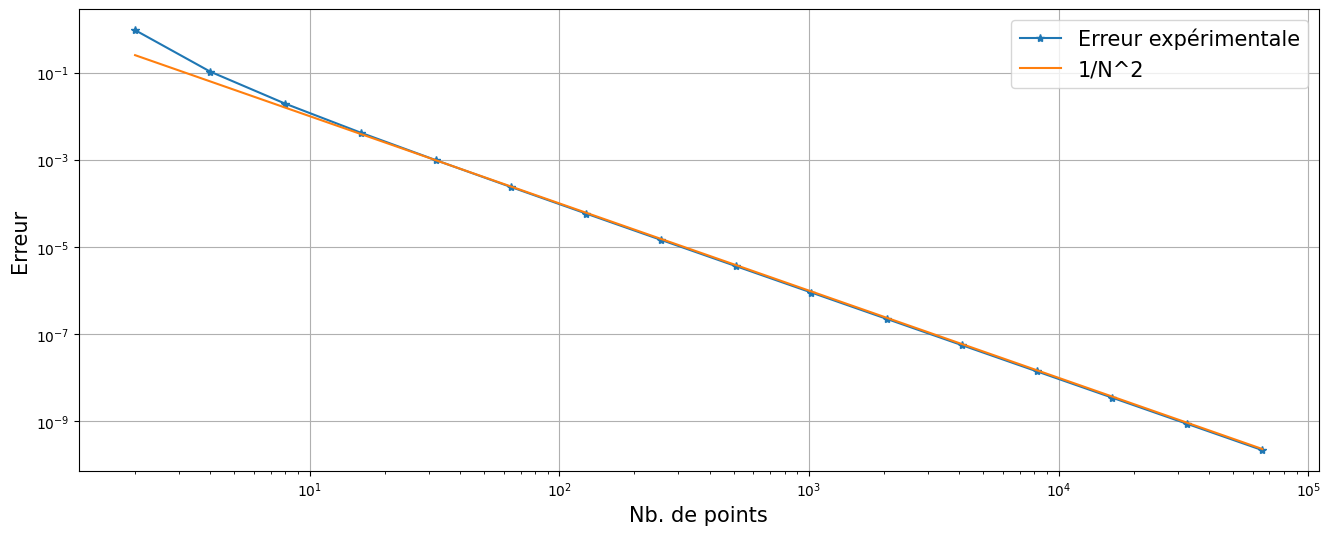

In [9]:
# creation de la liste des nombres de points de quadrature 
N      = 16
list_n = 2**np.arange(1, N+1, dtype='int64')


# Calculer Err_u la liste des erreurs avec la formule des trapèzes
Err_u = np.abs(np.fromiter((my_trapeze(u, a, b, n) - I_u for n in list_n), dtype=np.double))

# creation d'une figure
fig_u = plt.figure(figsize = (16,6))

# trace la figure
plt.loglog(list_n, Err_u, marker='*', label="Erreur expérimentale")
plt.loglog(list_n, 1/(list_n**2), label="1/N^2")

# nom de l'axe des abscisses
plt.xlabel('Nb. de points', fontsize = 15)
# nom de l'axe des ordonnees
plt.ylabel('Erreur', fontsize = 15)
# taille des légendes
plt.legend(fontsize = 15)
# trace une grille reguliere sur la figure
plt.grid()
# montre a l'ecran cette figure
plt.show(fig_u)

### Question 2 : Utilisation de la formule d'Euler-Maclaurin :

>Si $f$ est de classe $\mathcal{C}^{2k+2}$, $k\in\mathbb{N}$, la formule d'Euler-Maclaurin nous donne une estimation plus précise:
>
>$$ \int_x^y f(t) dt = (y-x)\frac{f(x)+f(y)}{2} + \sum_{j=1}^k (y-x)^{2j} \frac{b_{2j}}{(2j)!} \left(f^{(2j-1)}(x)-f^{(2j-1)}(y)\right) \quad{}-(y-x)^{2k+3}\frac{b_{2k+2}}{(2k+2)!} f^{(2k+2)}(\xi),$$
>
>où $b_{2j}$ sont les nombres de Bernoulli. On a notamment $b_2=\frac{1}{6}$, $b_4=\frac{-1}{30}$ et $b_6=\frac{1}{42}$.

1) En supposant $f$ de classe $\mathcal{C}^6$, montrer qu'on a

$$ I_n(f) = \int_a^b f(t) dt - \frac{(b-a)^2}{12 n^2} \left(f'(a)-f'(b) \right) + \frac{(b-a)^4}{720 n^4} \left(f^{(3)}(a)-f^{(3)}(b) \right) + O\left(\frac{1}{n^6}\right). $$

$$I_n(f) = \int\limits_a^b f + \sum\limits_{k = 1} ^{n-1} \left( \frac{b - a}{n} \right)^2 \frac{b_2}{2}(f'(a_{k+1}) - f'(a_k)) + \sum\limits_{k = 1} ^{n-1} \left( \frac{b - a}{n} \right)^4 \frac{b_4}{24}(f^{(3)}(a_{k+1}) - f^{(3)}(a_k)) + \sum\limits_{k = 1} ^{n-1} \mathcal{O}\left(\frac{1}{n^7}\right) $$

En plus, $\sum\limits_{k = 1} ^{n-1} \mathcal{O}\left(\frac{1}{n^7}\right) = \mathcal{O}\left(\frac{1}{n^6}\right)$

2) **<font color=black><span style="background-color:deepskyblue">Bonus : </span></font>**

- Appliquer la méthode des trapèzes pour approcher l'intégrale de $v : t\mapsto t^3\ln t - \frac{3+12\ln 2}{2}(t-1)^2$ entre $1$ et $2$.
- Comme à la question 1, étudier la convergence de $I_n$. Commenter. 

In [10]:
def v(x):
    """
    calcule la valeur de v(x)
    ----------   
    parametre:
    x : point ou on evalue v
    
    valeur de retour:
    valeur de v(x)
    """
    return x**3*np.log(x)-(3+12*np.log(2))/2*(x-1)**2

In [11]:
a = 1
b = 2

I_v = quad(v, a, b)[0]
print(f"Valeur de l'intégrale obtenue par quad de scipy de v entre {1} et {2} : {I_v}")

Valeur de l'intégrale obtenue par quad de scipy de v entre 1 et 2 : -0.051205638880109344


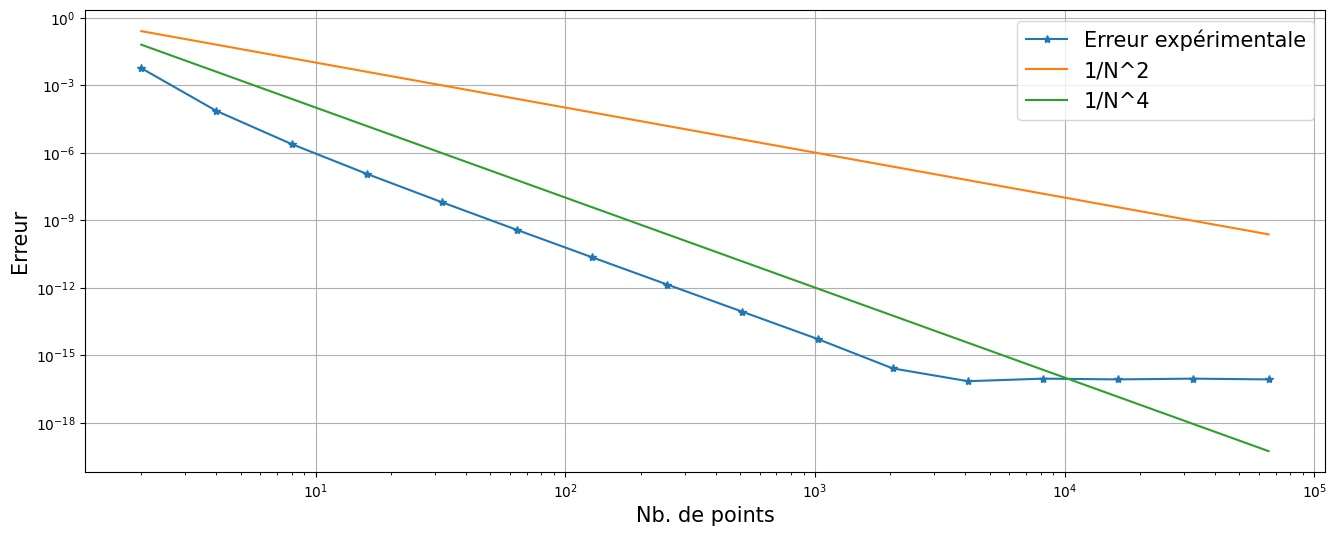

In [12]:
# creation de la grille et calcul des valeurs 
N      = 16
list_n = 2**np.arange(1, N+1, dtype='int64')


# Calculer Err_u la liste des erreurs avec la formule des trapèzes
Err_v = np.abs(np.fromiter((my_trapeze(v, a, b, n) - I_v for n in list_n), dtype=np.double))



# creation d'une figure
fig_v = plt.figure(figsize = (16,6))

#trace la figure
plt.loglog(list_n, Err_v, marker='*', label="Erreur expérimentale")
plt.loglog(list_n, 1/(1.*list_n)**2, label="1/N^2")
plt.loglog(list_n, 1/(1.*list_n)**4, label="1/N^4")

# nom de l'axe des abscisses
plt.xlabel('Nb. de points', fontsize = 15)
# nom de l'axe des ordonnees
plt.ylabel('Erreur', fontsize = 15)
# taille des légendes
plt.legend(fontsize = 15)
# trace une grille reguliere sur la figure
plt.grid()
# montre a l'ecran cette figure
plt.show(fig_v)

**Réponse :** 

### Question 3 : Accélération de convergence, extrapolation de Richardson :

>On suppose dans cette question que $n$ est une puissance de $2$, et que $f$ est de classe $\mathcal{C}^6$.

1) a) Trouver des coefficients $\alpha^{(1)}$ et $\beta^{(1)}$ tels que

$$ R^{(1)}_n(f) := \frac{\alpha^{(1)} I_n(f) - I_{\frac{n}{2}}(f)}{\beta^{(1)}} $$

vérifie 

$$ \left\vert \int_a^b f(t) dt - R^{(1)}_n(f) \right\vert = O\left(\frac{1}{n^4}\right). $$

b) Trouver ensuite des coefficients $\alpha^{(2)}$ et $\beta^{(2)}$ tels que

$$ R^{(2)}_n(f) := \frac{\alpha^{(2)} R^{(1)}_n(f) - R^{(1)}_{\frac{n}{2}}(f)}{\beta^{(2)}} $$

vérifie

$$ \left\vert \int_a^b f(t) dt - R^{(2)}_n(f) \right\vert = O\left(\frac{1}{n^6}\right). $$

a)

$$\lim_{n\rightarrow \infty} R_\infty (f) = I_\infty (f) \cdot \frac{\alpha^{(1)} - 1}{\beta ^{(1)}} = \int f \cdot \frac{\alpha^{(1)} - 1}{\beta ^{(1)}}$$

$$\therefore \frac{\alpha^{(1)} - 1}{\beta ^{(1)}} = 1$$

$$\left | \int\limits_a^b f - R_n^{(1)}(f) \right | = \left |\int \limits_a^b f - \frac{\alpha^{(1)}I_n(f) - I_{\frac{n}{2}}(f)}{\beta ^{(1)}} \right | = \left |\int\limits_a^b f - \frac{1}{\beta ^{(1)}}\left[ (\alpha^{(1)} - 1) \int\limits_a^b f + \frac{C_1}{n^2}(\alpha^{(1) - 4}) + \frac{C_2}{n^4}(\alpha^{(1)} - 16) \right] + \mathcal{O}\left(\frac{1}{n^6}\right) \right |$$

Si $\frac{\alpha^{(1)} - 1}{\beta ^{(1)}} = 1$ $\rightarrow \mathcal{O}\left(\frac{1}{n^2}\right)$

Si $\alpha^{(1)} - 4 = 0$ $\rightarrow \mathcal{O}\left(\frac{1}{n^4}\right)$ 

Alors $\alpha^{(1)} = 4$ et $\beta^{(1)} = 3$

b) 

$$\left | \int\limits_a^b f - R_n^{(2)}(f) \right | = \left |\int \limits_a^b f \cdot \left(\frac{\alpha^{(2)} - 1}{\beta ^{(2)}}\right) + \frac{1}{n^2}\cdot 0 + \frac{C_1}{n^4} \frac{\alpha^{(2)} - 16}{\beta ^{(2)}} + \frac{C_2}{n^2}\frac{\alpha^{(3)} - 2^6}{\beta ^{(3)}} + \mathcal{O}\left(\frac{1}{n^6}\right) \right | $$

Si $f\in \mathcal{C}^{2k + 2}$, $R_n^{(k)}(f)\frac{\alpha^{(k)}R^{(k-1)}_n(f) - R_{\frac{n}{2}}^{(k-1)}(f)}{\beta ^{(k)}}$

Alors $\alpha^{(k) = 2^{2k}}$ et $\beta^{(k)} = \alpha^{(k)} - 1$

2) **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>**
- Calculer $R^{(1)}_n$ et $R^{(2)}_n$ pour l'exemple de la fonction $u$ de la question 1. 2).
- Étudier la vitesse de convergence. Commenter.

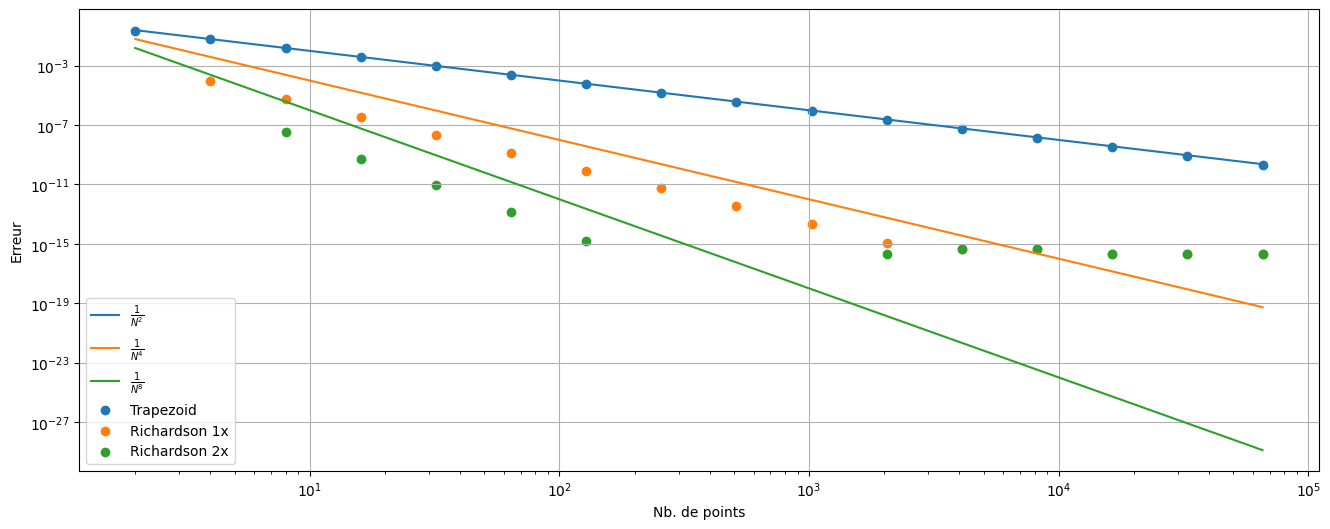

In [70]:
a = 1
b = 2

# Calcul avec scipy.quad
I_u = quad(u, a, b)[0]

# creation de la grille et calcul des valeurs 
N      = 16
list_n = 2**np.arange(1, N+1, dtype='int64')


# Calculer Err_R1_n et Err_R2_n les listes des erreurs avec les méthodes de Richardson
alpha1 = 4
beta1 = 3

alpha2 = 16
beta2 = 15
I_n = np.fromiter((my_trapeze(u, a, b, n + 1) for n in list_n), dtype=np.double)

R1_n = (alpha1*I_n[1:] - I_n[:-1])/beta1

Err_R1_n = R1_n - I_u
Err_R2_n = (alpha2*R1_n[1:] - R1_n[:-1])/beta2 - I_u


# creation d'une figure
fig_err = plt.figure(figsize = (16,6))

# trace la figure 
plt.loglog(list_n, 1/(1.*list_n)**2, label="$\\frac{1}{N^2}$")
plt.loglog(list_n, 1/(1.*list_n)**4, label="$\\frac{1}{N^4}$")
plt.loglog(list_n, 1/(1.*list_n)**6, label="$\\frac{1}{N^8}$")
plt.scatter(list_n, np.abs(I_n - I_u), label="Trapezoid")
plt.scatter(list_n[1:], np.abs(Err_R1_n), label="Richardson 1x")
plt.scatter(list_n[2:], np.abs(Err_R2_n), label="Richardson 2x")

# nom de l'axe des abscisses
plt.xlabel('Nb. de points')
# nom de l'axe des ordonnees
plt.ylabel('Erreur')
# legende
plt.legend()
# trace une grille reguliere sur la figure
plt.grid()
# montre a l'ecran cette figure
plt.show(fig_err)


>**Remarque :** pour n = 256, n = 512 et n = 1024, l'erreur obtenue pour R2_n est exactement le zéro machine, ce qui explique l'absence de points sur le graphe en échelle log.

Selon le graph, on peut voir que le méthode des trapezes est $\mathcal{O}\left(\frac{1}{N^2}\right)$, le $R^{(1)}$ est $\mathcal{O}\left(\frac{1}{N^4}\right)$, et le $R^{(2)}$ est $\mathcal{O}\left(\frac{1}{N^6}\right)$. Mais, lorsque l'erreur s'approxime du $\epsilon_m$, l'erreur ne peut pas baisser.

**Réponse :** 

### Question 4 : Méthode de Romberg :

On considère à nouveau la fonction $u$ de la question 1. 2). Obtenir une approximation de l'intégrale la plus précise possible **en évaluant $f$ au maximum 65 fois.** 

*Indication : On pourra itérer le processus d'accélération décrit à la question précédente.*

**Réponse :** 

In [ ]:
# creation de la grille et calcul des valeurs 
N      = 4
list_n = 2**np.arange(1, N+1, dtype='int64')


# Calculer l'erreur en faisant au plus 65 évaluation de f


print("Solution :", R[-1,0], "Erreur :", )

---

## Exercice 2 : Polynômes orthogonaux et formules de Gauss
>Soit une fonction poids $w \in C^0(]-1,1[)$ positive et telle que
>
>$$ \int_{-1}^1 \vert x^n\vert w(x)\, dx < \infty \quad{} \forall~n\in\mathbb{N}. $$
>
>On définit le produit scalaire sur $C^0([-1,1])$ et la norme associée 
>
>$$ \left<f,\ g\right>_w = \int_{-1}^{1} g(x) f(x) w(x) \, dx, \qquad{} \left\| f \right\|_w = \sqrt{\left<f, \ f\right>_w}. $$

### Question 1 : Construction des polynômes orthogonaux :

1) a) Montrer que pour toute fonction poids $w$, il existe une suite $(p_n)_{n\in\mathbb{N}}$ de polynômes orthogonaux 

$$ \left<p_n, p_{n'} \right>_w = \alpha_n \delta_{n,n'}, \qquad deg(p_n) = n.$$

b) Montrer que si on choisit les $p_n$ normalisés, c'est-à-dire tels que $\alpha_n = 1$, alors cette suite est unique au signe près.

2) Montrer que les polynômes de Legendre $L_n$ et de Tchebychef $T_n$ définis respectivement par
 
$$L_n(x) = \frac{1}{2^{n} n!}\frac{d^n}{dx^n}\left[(x^2-1)^n \right], \quad{} T_n(x) = \cos(n\arccos(x)) $$

sont orthogonaux pour les poids $w_L(x) = 1$ et $w_T(x) = \frac{1}{\sqrt{1-x^2}}$.

1.

$p_0$ unique

$p_0(x) = \alpha$ constant, $\mathbb{R}_0[X]$

$\int\limits_{-1}^1 p_0 \cdot p_0 w = \alpha^2 \int\limits_{-1}^1 w(x) dx = 1$

$$\alpha = \pm \left( \int\limits_{-1}^1 w(x)dx \right)^{-\frac{1}{2}}$$

$p_{n+1} \in \mathbb{R}_{n+1}[X]$

$\mathbb{R}_n[X] \subset \mathbb{R}_{n+1}[X]$

$p_{n+1} \in \mathbb{R}_n[X]^\perp$ qui est de dimension 1. Alors, unique après normalization au signe près.

2.

$$I_1 = \int\limits _{-1}^1 \frac{d^n}{dx^n}((x^2 - 1)^n)\frac{d^{n'}}{dx^{n'}}((x^2 - 1)^{n'}) dx = \alpha_n \delta_{n, n'}$$

$n \geq n'$

$$I_1 = \cancel{\left[ \frac{d^{n-1}}{dx^{n-1}}((x^2 - 1)^n)\frac{d^{n'}}{dx^{n'}}((x^2 - 1)^{n'}) \right]} - \int\limits _{-1}^1 \frac{d^{n-1}}{dx^{n-1}}((x^2 - 1)^n)\frac{d^{n'}}{dx^{n'+1}}((x^2 - 1)^{n'}) dx $$

$$I_1 = \int\limits _{-1}^1 \frac{d^{n-n'}}{dx^{n-n'}}((x^2 - 1)^n)(2n')! dx  = 
\begin{cases}
0 \text{, si } n \neq n' \\
(2n)! \int\limits _{-1}^1 (x^2 - 1)^n dx
\end{cases}$$

$$I_2 = \int\limits _{-1}^1 T_n(x)T_{n'}(x) \frac{1}{\sqrt{1 - x^2}} dx = \int\limits _{0}^\pi cos(n\theta)cos(n'\theta) d\theta = \int\limits _{0}^\pi \frac{1}{2} \left [\cancel{cos((n+n')\theta)} + cos((n-n')\theta)\right] = \frac{1}{2}C_n\delta_{nn'}$$

Tous les polynomes orthogonaux peuvent être écrits par:

$$p_{n+1} = (x - a_n)p_n + b_n p_{n-1}$$

### Question 2 : Quadrature de Gauss-Legendre :

>Pour une famille $(p_n)_{n\in\mathbb{N}}$ de polynômes orthogonaux, les formules de quadrature de Gauss sont données par 
>
>$$ Q_n(f) = \sum\limits_{i=0}^n w_i f(x_i) $$
>
> où les $x_i$ sont les racines de $p_{n+1}$. Les poids $w_i$ sont calculés afin que la méthode soit d'ordre le plus élevé possible, c'est-à-dire afin que la méthode soit exacte pour tout polynôme de degré au plus $N$, avec $N$ le plus grand possible. On peut montrer que le choix de ces points est optimal en terme d'ordre pour le calcul des intégrales $\left<f,1\right>_w$ pour une fonction poids $w$ donnée. 

1) Calculer les points d'interpolation de Legendre $(x_i)_{i=0,\dots,n}$ pour $n=1$ et $n=2$, c'est-à-dire les racines de $L_2$ et de $L_3$.   

2) Calculer les poids $w_i$ associés pour ces deux familles de points.

3) **<font color=black><span style="background-color:deepskyblue">Bonus : </span></font>**

Implémenter une fonction qui prend en entrée une fonction $f$ et renvoie l'approximation de son intégrale sur $[-1,+1]$ par la quadrature de Gauss-Legendre à 2 points.
De même pour la formule à 3 points. 
Tester ces deux fonctions avec les polynômes $x\mapsto x^i$ et en déduire l'ordre de ces formules.

>**Remarque :** Ce résultat sur l'ordre de la quadrature de Gauss-Legendre se généralise avec les autres familles de polynômes orthogonaux comme ci-après.

In [26]:
def quad_Legendre2(y1, y2):
    """
    calcule la valeur approchée d'une integrale sur [-1,1] 
    à deux points de quadrature aux points de Legendre 
    ----------   
    parametres :
    y1, y2 : valeurs de la fonction à intégrer aux points de Legendre
    
    valeur de retour :
    valeur approchée de l'intégrale
    """
    return y1 + y2

In [27]:
def quad_Legendre3(y1, y2, y3):
    """
    calcule la valeur approchée d'une integrale sur [-1,1] 
    à trois points de quadrature aux points de Legendre 
    ----------   
    parametres :
    y1, y2, y3 : valeurs de la fonction à intégrer aux points de Legendre
    
    valeur de retour :
    valeur approchée de l'intégrale
    """
    return (5*(y1 + y3) + 8*y2)/9

In [57]:
# Tester vos fonctions sur des polynômes jusqu'au degrès 6

roots2 = [-1/np.sqrt(3), 1/np.sqrt(3)]
roots3 = [-np.sqrt(3/5), 0, np.sqrt(3/5)]

def integral_x_n(n, a=-1, b=1):
    return (b**(n + 1) - a**(n + 1))/(n + 1)

for n in range(7):
    p = lambda x: x**n
    print(f'Integrales de p(x) = x^{n} vaut {integral_x_n(n)}, approchée par Gauss-Legendre à 2 points : {quad_Legendre2(p(roots2[0]), p(roots2[1]))} et 3 points : {quad_Legendre3(p(roots3[0]), p(roots3[1]), p(roots3[2]))}') 

Integrales de p(x) = x^0 vaut 2.0, approchée par Gauss-Legendre à 2 points : 2.0 et 3 points : 2.0
Integrales de p(x) = x^1 vaut 0.0, approchée par Gauss-Legendre à 2 points : 0.0 et 3 points : 0.0
Integrales de p(x) = x^2 vaut 0.6666666666666666, approchée par Gauss-Legendre à 2 points : 0.6666666666666669 et 3 points : 0.6666666666666667
Integrales de p(x) = x^3 vaut 0.0, approchée par Gauss-Legendre à 2 points : 0.0 et 3 points : 0.0
Integrales de p(x) = x^4 vaut 0.4, approchée par Gauss-Legendre à 2 points : 0.22222222222222235 et 3 points : 0.4000000000000001
Integrales de p(x) = x^5 vaut 0.0, approchée par Gauss-Legendre à 2 points : 0.0 et 3 points : 0.0
Integrales de p(x) = x^6 vaut 0.2857142857142857, approchée par Gauss-Legendre à 2 points : 0.07407407407407414 et 3 points : 0.24000000000000007


Comme la quadrature de 2 points a eu le bon résult jusqu'à $x^2$, il semble qu'elle est de quatrième ordre. Par contre, la quadrature de 3 points semble être de sixième ordre, parce que le résultat de $x^4$ était assez précis.

### Question 3 : Formule composite

On va maintenant décomposer l'intervale d'intégration en $m$ sous-intervales et utiliser la méthode de Gauss-Legendre à deux points sur chacun d'entre eux. 

1) **<font color=black><span style="background-color:deepskyblue">Bonus : </span></font>**

a) Construire une fonction qui découpe un intervalle $[a,b]$ en $m$ sous-intervalles (de même longueur) et renvoie les deux points de Legendre sur chaque sous-intervalle comme indiqué :

In [33]:
def cut_interval_Legendre2(a, b, m):
    """
    découpe un intervalle en m sous-intervalles et renvoie les points de Legendre sur chaque sous-intervalle
    ----------   
    parametres :
    a, b : bornes de l'intervalle
    m    : nombre de sous-intervalles
    
    valeur de retour :
    x_L2 : matrice contenant les points de Legendre dans chaque sous-intervalle
    
    exemple : x_L2[i,j] est le j-eme point de Legendre du i-eme sous-intervalle
    """
    def scaled_points_Legendre(a_, b_):
        roots2 = np.array([-1/np.sqrt(3), 1/np.sqrt(3)])
        return a_ + (roots2 + 1)*(b_ - a_)/2
    
    interval_ends = np.linspace(a, b, m + 1)
    return np.array([scaled_points_Legendre(interval_ends[i], interval_ends[i + 1]) for i in range(m)])

In [36]:
# tester votre fonction sur [1,2] avec 1, 2 puis 10 sous-intervalles
print("[-1,1] 1 sous-intervalles :", cut_interval_Legendre2(-1, 1, 1))
print("indication   : 1/sqrt(3) = ",1/np.sqrt(3),"\n")
print()
print("[1,2] 2 sous-intervalles  :", cut_interval_Legendre2( 1, 2, 2),"\n")
print("[1,2] 3 sous-intervalles  :",cut_interval_Legendre2( 1, 2, 3),"\n")
print("[1,2] 10 sous-intervalles :",cut_interval_Legendre2( 1, 2, 10))

[-1,1] 1 sous-intervalles : [[-0.57735027  0.57735027]]
indication   : 1/sqrt(3) =  0.5773502691896258 


[1,2] 2 sous-intervalles  : [[1.10566243 1.39433757]
 [1.60566243 1.89433757]] 

[1,2] 3 sous-intervalles  : [[1.07044162 1.26289171]
 [1.40377496 1.59622504]
 [1.73710829 1.92955838]] 

[1,2] 10 sous-intervalles : [[1.02113249 1.07886751]
 [1.12113249 1.17886751]
 [1.22113249 1.27886751]
 [1.32113249 1.37886751]
 [1.42113249 1.47886751]
 [1.52113249 1.57886751]
 [1.62113249 1.67886751]
 [1.72113249 1.77886751]
 [1.82113249 1.87886751]
 [1.92113249 1.97886751]]


b) Construire une fonction qui calcule la valeur approchée d'une intégrale sur $[a,b]$ en utilisant les quadratures de Gauss-Legendre à 2 points sur $m$ sous intervalles de $[a,b]$.

In [58]:
def quad_N_Legendre2(x_L2, y_L2, a, b, m):
    """
    calcule la valeur approchée d'une integrale sur [a,b] 
    en utilisant une quadrature de Gauss-Legendre à 2 points sur N sous-intervalles
    ----------   
    parametres :
    x_L2 : matrice contenant les points de Legendre dans chaque sous-intervalle
    y_L2 : matrice contenant la valeur de la fonction à intégrer aux abscisses x_L2
    a, b : bornes de l'intervale d'intégration
    m    : nombre de sous-intervalles
    
    valeur de retour :
    valeur approchée de l'intégrale
    """
    
    return np.sum(y_L2)*(b - a)/(2*m)

In [59]:
# Tester votre fonctions sur des polynômes jusqu'au degrès 6

a = -1
b = 1

for n in range(7):
    p = lambda x: x**n

    x_L2 = cut_interval_Legendre2(a, b, n + 1)
    y_L2 = p(x_L2)

    print(f'Integrales de p(x) = x^{n} vaut {integral_x_n(n)}, approchée par Gauss-Legendre à 2 points sur {n + 1} sous-intervales : {quad_N_Legendre2(x_L2, y_L2, a, b, n + 1)}') 

Integrales de p(x) = x^0 vaut 2.0, approchée par Gauss-Legendre à 2 points sur 1 sous-intervales : 2.0
Integrales de p(x) = x^1 vaut 0.0, approchée par Gauss-Legendre à 2 points sur 2 sous-intervales : 0.0
Integrales de p(x) = x^2 vaut 0.6666666666666666, approchée par Gauss-Legendre à 2 points sur 3 sous-intervales : 0.6666666666666666
Integrales de p(x) = x^3 vaut 0.0, approchée par Gauss-Legendre à 2 points sur 4 sous-intervales : 0.0
Integrales de p(x) = x^4 vaut 0.4, approchée par Gauss-Legendre à 2 points sur 5 sous-intervales : 0.39971555555555566
Integrales de p(x) = x^5 vaut 0.0, approchée par Gauss-Legendre à 2 points sur 6 sous-intervales : -1.1102230246251565e-16
Integrales de p(x) = x^6 vaut 0.2857142857142857, approchée par Gauss-Legendre à 2 points sur 7 sous-intervales : 0.28534982611940335


c) Tester cette méthodes de quadrature pour le calcul de l'intégrale $\int_1^2 t^3 \log(t) dt$ définie à l'exercice 2, question 1, 3) avec $m=2, 4$ et $2^5$ sous-intervalles. Tracer ensuite la courbe de convergence en fonction du nombre $m$ de sous-intervalles (prendre plus de valeurs de $m$).

In [71]:
# tester votre fonction avec la fonction
list_m = 2**np.arange(0, 16, dtype='int64')

a = 1
b = 2

print(f"Integral = {I_u}")
for m in [list_m[1], list_m[2], list_m[5]]:
    x_L2 = cut_interval_Legendre2(a, b, m)
    y_L2 = u(x_L2)
    I = quad_N_Legendre2(x_L2, y_L2, a, b, m)
    print(f"For m = {m}, integral = {I}. Relative error = {100*np.abs((I - I_u)/I_u)}%")


Integral = 1.8350887222397811
For m = 2, integral = 1.8350290469726884. Relative error = 0.0032519009228002137%
For m = 4, integral = 1.8350849696517344. Relative error = 0.00020449082386413418%
For m = 32, integral = 1.8350887213217055. Relative error = 5.002894979430298e-08%


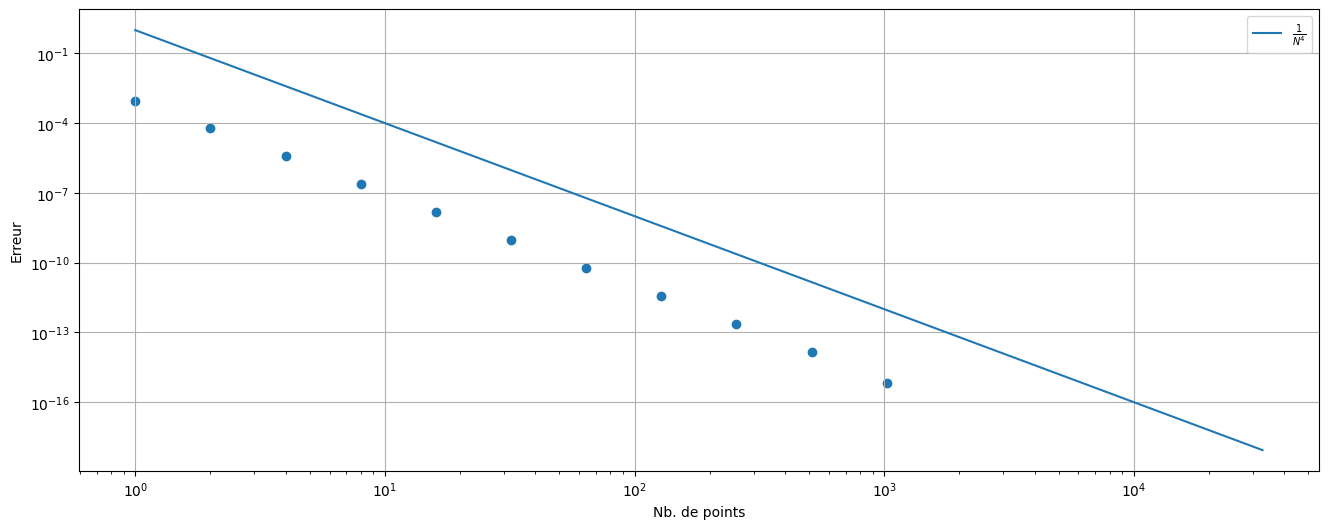

In [72]:
# tracer la courbe de convergence en fonction de m en échelle log
a = 1
b = 2

errors = np.abs(np.fromiter((quad_N_Legendre2(None, u(cut_interval_Legendre2(a, b, m)), a, b, m) - I_u for m in list_m), dtype=np.double))

# creation d'une figure
fig_err = plt.figure(figsize = (16,6))

# trace la figure 
plt.loglog(list_m, 1/(1.*list_m)**4, label="$\\frac{1}{N^4}$")
plt.scatter(list_m, errors)


# nom de l'axe des abscisses
plt.xlabel('Nb. de points')
# nom de l'axe des ordonnees
plt.ylabel('Erreur')
# trace une grille reguliere sur la figure
plt.legend()

plt.grid()
# montre a l'ecran cette figure
plt.show(fig_err)

### Question 4 : Formule de Gauss-Tchebychev

1) Comme à la question 2, calculer les points et les poids de quadrature pour Gauss-Tchebychev avec $n=1$ et $n=2$.

2) De même, implémenter une fonction qui prend en entrée une fonction $f$ et renvoie l'approximation de son intégrale sur $[-1,1]$ par la quadrature de Gauss-Tchebychev à 2 points puis à 3 points. 
Tester ces deux fonctions avec les polynômes $x\mapsto x^i$ et en déduire l'ordre de ces formules.

3) Quels sont les points communs et les différences avec la méthode de Clenshaw-Curtis?

In [ ]:
### 2.
def quad_Cheb2(y1, y2):
    """
    calcule la valeur approchée d'une integrale sur [-1,1] 
    à deux points de quadrature aux points de Tchebychev 
    ----------   
    parametres :
    y1, y2 : valeurs de la fonction à intégrer aux points de Tchebychev
    
    valeur de retour :
    valeur approchée de l'intégrale
    """
    return 

In [ ]:
def quad_Cheb3(y1, y2, y3):
    """
    calcule la valeur approchée d'une integrale sur [-1,1] 
    à trois points de quadrature aux points de Tchebychev 
    ----------   
    parametres :
    y1, y2, y3 : valeurs de la fonction à intégrer aux points de Tchebychev
    
    valeur de retour :
    valeur approchée de l'intégrale
    """
    return 

In [ ]:
# Tester votre fonctions sur des polynômes jusqu'au degrès 6

print('Integrales de p(x) = 1 vaut ",   ," approchée par Gauss-Tchebychev à 2 points :', ," et à 3 points :", ) 

---

## Exercice 3 : Comparaison de méthodes

On va chercher à comparer numériquement les taux de convergence de plusieurs formules de quadrature en fonction du nombre de degrés de liberté et sur plusieurs fonction. On pourra consulter [1] pour plus d'explications sur la convergence en pratique des méthodes de Clenshaw-Curtis et de Gauss-Legendre et les éventuelles différences avec les estimations théoriques. 

### Question 1 : 

1) Calculer analytiquement les intégrales des fonctions suivantes sur $[-1,1]$ 

$$ f(x) = \cos\left(\pi x\right), \qquad g(x) = x^{15}, \qquad h(x) = \frac{1}{1+16 x^2}, \quad i(x) = |x|^3.$$

2) Rappeler et comparer les estimations d'erreurs théoriques du cours ou de la PC (plus haut) sur l'approximation d'une intégrale par les méthodes  
- de Gauss-Legendre en fonction du nombre $n$ de points de quadrature
- de Clenshaw-Curtis en fonction du nombre $n$ de points de quadrature
- des trapèzes en fonction du nombre $n$ de points de quadrature (ou $n-1$ est également le nombre de sous-intervales)
- de Gauss-Legendre composite, avec 2 points de quadrature par sous-intervalle et $n/2$ sous-intervalles (ce qui fait toujours un total de $n$ points de quadrature).

---
Une implémentation des méthodes de Gauss-Legendre et de Clenshaw-Curtis à $n$ points est proposée dans les cellules suivantes. 

In [ ]:
def GL(f, a, b, n):
    """
    calcule la valeur approchée d'une integrale sur [a,b] 
    en utilisant une quadrature de Gauss-Legendre à n points
    ----------   
    parametres :
    f    : fonction dont on cherche l'intégrale
    a, b : bornes de l'intervale d'intégration
    n    : nombre de points de quadrature
    
    valeur de retour :
    valeur approchée de l'intégrale
    """
    x, w = p_roots(n)
    return np.sum(w * f( x*(b-a)/2+(b+a)/2 ) ) * (b-a)/2

In [ ]:
def CC(f, a, b, n):
    """
    calcule la valeur approchée d'une integrale sur [a,b] 
    en utilisant une quadrature de Clenshaw-Curtis à n points
    ----------   
    parametres :
    f    : fonction dont on cherche l'intégrale
    a, b : bornes de l'intervale d'intégration
    n    : nombre de points de quadrature
    
    valeur de retour :
    valeur approchée de l'intégrale
    """
    if ( n == 1 ):
        return f((a+b)/2)*(b-a)
    else:
        theta = (2*np.arange(0,n)+1)/(2*n)*np.pi
        x     = np.cos(theta)
               
        w = np.ones(n)
        for k in range(1,n):
            if(k%2==0):
                w += 2.*np.cos(k*theta)/(1.-k**2)
        w *= 2./n   
        
        return np.sum(w * f( x*(b-a)/2+(b+a)/2 ) ) * (b-a)/2 

In [ ]:
# Exemple d'utilisation des fonction CC et GL
a, b = -1, 1
n    = 10
I_CC = CC(np.exp,a,b,n)
I_GL = GL(np.exp,a,b,n)

print("Quadrature de Clenshaw-Curtis de exp sur [",a,b,"] à ",n,"points :", I_CC)
print("Quadrature de Gauss-Legendre  de exp sur [",a,b,"] à ",n,"points :", I_GL)

### Question 2 : Comparaison entre Gauss-Legendre et méthodes composites 

1) Calculer l'erreur $e_n$ entre les intégrales exactes calculées à la question précédente et leurs approximations par la **formule des trapèzes** de l'exercice précédent pour un nombre de points de quadrature $n = 2^i$, $i$ allant de 1 à 7.  

2) Calculer l'erreur $e^n$ entre les intégrales exactes calculées à la question précédente et leurs approximations par la **formule de Gauss-Legendre composite à 2 et 3 points par sous-intervalle**, pour un nombre de points de quadrature $n = 2^i$, $i$ allant de 1 à 7. 

3) Calculer l'erreur $e_n$ entre les intégrales exactes calculées à la question précédente et leurs approximations par la **formule de Clenshaw-Curtis** pour un nombre de points de quadrature $n = 2^i$, $i$ allant de 1 à 7.  

4) Calculer l'erreur $e_n$ entre les intégrales exactes calculées à la question précédente et leurs approximations par la **formule de Gauss-Legendre composite à 2 points par sous-intervalle**, pour un nombre $n/2$ de sous-intervalles, $n = 2^i$ avec $i$ allant de 1 à 7. 

5) Tracer sur le même graphe ces erreurs en fonction de $n$ et comparer numériquement la convergence de ces méthodes. Les estimations théoriques sur l'erreur en fonction de $n$ sont-elles précises pour ces fonctions?

In [ ]:
# fonctions dont on cherche l'intégrale
def f(x):
    return np.cos(np.pi*x)

def g(x):
    return x**20

def h(x):
    return 1/(1+16*x**2)

def i(x):
    return np.abs(x)**3

In [ ]:
N = 7
print(np.arange(1, N+1, dtype='int64'))

In [ ]:
# creation de la grille et calcul des valeurs 
N      = 7
list_n = 2**np.arange(1, N+1, dtype='int64')


# Calculer Err_Tr, Err_CC_f, Err_GL_f, les liste des erreurs
# avec la formule des trapèzes, de Clenshaw-Curtis et de Gauss-Legendre
Err_Tr_f = np.zeros(len(list_n))
Err_CC_f = np.zeros(len(list_n))
Err_GL_f = np.zeros(len(list_n))
Err_GL_comp_f = np.zeros(len(list_n))

    

    
plt.figure()
plt.loglog(list_n,err_Tr_f,marker='*',label="Trapeze")
plt.loglog(list_n,err_CC_f,marker='*',label="CC")
plt.loglog(list_n,err_GL_f,marker='*',label="GL")
plt.loglog(list_n,err_GL_comp_f,marker='*',label="GL")
plt.legend()
plt.grid()
plt.xlabel("nb total de points de quadrature")
plt.show()

---

## Exercice 4 : Intégration d'une fonction oscillante

>On considére la fonction :
>
>$$ f: ]0,1] \to [-1,1], \qquad{} f(x) = \sin\left(\frac{1}{x}\right). $$
>
>L'objectif de cet exercice est d'étudier différentes manières de calculer numériquement l'intégrale :
>
>$$ I =\displaystyle  \int_0^1 f(x)dx. $$

In [ ]:
# fonction dont cherche l'intégrale
def f(x):
    return np.sin(1/x)

In [ ]:
# On represente f sur [0,1]
# creation de la grille
x = np.linspace(1.e-10, 1, 10000)
# creation d'une figure
fig_f = plt.figure(figsize = (16,6))
# trace la figure reliant les points dont les abscisses sont stockees dans grid et les ordonnees dans values
plt.plot(x, f(x))
# nom de l'axe des abscisses
plt.xlabel('x')
# nom de l'axe des ordonnees
plt.ylabel('f(x)')
# trace une grille reguliere sur la figure
plt.grid()
# montre a l'ecran cette figure
plt.show(fig_f)

### Question 1 

- Utiliser la fonction *quad* de *scipy.integrate* pour essayer d'intégrer directement la fonction $f$ sur $]0,1]$. 
- Vous obtenez normalement un message d'avertissement, indiquant que le résultat obtenu peut être imprécis.  Quelle est la caractéristique de $f$ qui rend l'intégration numérique particulièrement difficile?

In [ ]:
# bornes d'integration
a = 0
b = 1

# utiliser quad pour obtenir une approximation de l'integrale et une estimation sur son erreur
I1, err1 = None, None
print(f"Valeur de l'intégrale I : {I1}")
print(f"Estimation de l'erreur : {err1}")

### Question 2

On note $a_k$ la suite décroissante des zéros de $f$. 

1) Donner la valeur des $a_k$ et écrire l'intégrale $I$ comme une série d'intégrales sur $[a_{k+1},a_k]$. 

2) Implémentation :
- Utiliser *quad* de *scipy.integrate* sur chacun des intervalles $[a_{k+1},a_k]$ pour $k \leq N$.
- En supposant que sur chacun de ces intervalles, *quad* renvoie un résulat exact, trouver un critère d'arrêt pour atteindre la précision $\varepsilon$ désirée avec $\varepsilon = 10^{-6}$ et $\varepsilon =10^{-9}$.

    *Indication : On cherchera un critère suffisamment fin pour pouvoir converger en moins de 100000 itérations dans le second cas.*

In [ ]:
def int_adapt(eps, N_max):
    """
    calcule une valeur approchee de l'integrale en utilisant quad sur chaque [a_{k+1},a_k]
    ----------   
    parametre:
    eps   : tolerance sur l'erreur
    N_max : nombre maximal de sous-intervalles [a_{k+1},a_k]
    
    valeur de retour:
    valeur approchee de l'integrale, nombre d'intervalles utilises pour atteindre la precision
    """
    return None, None
        
# parametres pour l'evaluation
eps_max = 1.e-6
N_max   = 100000

# Evaluation 
I2, N_I2 = int_adapt(eps_max, N_max)
print(f"Valeur de l'intégrale I : {I2}")
print(f"Nombre d'intervalles : {N_I2}")

### Question 3

1) Montrer que 

$$ \int_0^1 f(x)dx = \cos 1 - \int_0^1 2x\cos(1/x)dx. $$

2) Implémentation :
- Évaluer cette expression à l'aide de *scipy* et comparer la précision obtenue aux résultats des questions 1 et 2. 
- Expliquer l'amélioration de la précision par rapport à la question 1.

In [ ]:
def g(x):
    """
    calcule la valeur de g(x)
    ----------   
    parametre:
    x : point ou on evalue g
    
    valeur de retour:
    valeur de g(x)
    """
    return 2*x*np.cos(1/x)


# bornes d'integration
a = 0
b = 1

# utiliser quad pour obtenir une approximation de l'integrale et une estimation sur son erreur
I3, err3 = None, None
print(f"Valeur de l'intégrale I : {I3}")
print(f"Estimation de l'erreur : {err3}")

In [ ]:
# On represente g sur [-1,1]
# creation de la grille
x     = np.linspace(1.e-10, 1, 10000)
# creation d'une figure
fig_g = plt.figure(figsize = (16,6))
# trace la figure reliant les points dont les abscisses sont stockees dans grid et les ordonnees dans values
plt.plot(x, g(x))
# nom de l'axe des abscisses
plt.xlabel('x')
# nom de l'axe des ordonnees
plt.ylabel('g(x)')
# trace une grille reguliere sur la figure
plt.grid()
# montre a l'ecran cette figure
plt.show(fig_g)

### Question 4 

La fonction cosinus intégral est définie par 

$$ \text{Ci}(x) = -\int_x^\infty \frac{\cos t}{t}dt. $$

1) Montrer que $I = \sin(1) - \text{Ci}(1)$. 

2) Utiliser la fonction *scipy.special.sici* pour obtenir la valeur $I$ avec précision machine, en supposant que la fonction *sici* est exacte. 

In [ ]:
# utiliser sici
I4 = None
print(f"Valeur de l'intégrale I : {I4}")

>**Remarque :** L'évaluation précise de $\text{Ci}(x)$ peut se faire a l'aide de la représentation en série sur $\mathbb{R}_+^*$:
>
>$$ \text{Ci}(x) = \gamma + \ln (x) +\sum\limits_{n=1}^\infty (-1)^n \frac{x^{2n}}{(2n)!(2n)}$$
>
>où $\gamma$ est la constante d'Euler-Mascheroni.

### Question 5

Considérer la fonction $h: \mathbb{C}^* \to \mathbb{C}$ définie par $h(z) = -\exp\left(-\frac{i}{z}\right)$.

1) Montrer que l'intégrale $I$ correspond à la partie imaginaire de l'intégrale de $h$ sur le chemin $\gamma_0 : [0,1]\to \mathbb{C}$, $\gamma_0(t) = t$. 

*Pour rappel, l'intégrale d'une fonction $h:\mathbb{C}\to\mathbb{C}$ le long d'un chemin $\gamma:[0,1]\to\mathbb{C}$ de classe $\mathcal{C}^1$ est donnée par*

$$ \int_{\gamma} h(z)dz = \int_0^1 h(\gamma(t))\gamma'(t)dt. $$

>On admet que 
>
>$$ \int_{\gamma_0} h(z)dz = \int_{\gamma_1} h(z)dz, $$
>
>où $\gamma_1 : [0,1] \to \Bbb{C}$, $\gamma_1(t) = t+it(1-t)$.

2) a) Utiliser *quad* de *scipy.integrate* pour calculer l'intégrale de $h$ sur le chemin $\gamma_1$, et comparer le résultat obtenu avec celui trouvé à la question 4. 

b) Représenter graphiquement la fonction $\text{Im}(h)$ sur le chemin $\gamma_1$ **et expliquer** pourquoi *scipy.integrate* arrive à bien intégrer $h$ sur le chemin $\gamma_1$.

In [ ]:
def im_h_gamma1(t):
    """
    calcule la valeur de Im(h(gamma1(t)) * gamma1'(t))
    ----------   
    parametre:
    t : point ou on evalue h
    
    valeur de retour:
    valeur de Im(h(gamma1(t)) * gamma1'(t))
    """
    return 

# bornes d'integration
a = 0
b = 1

# calcul de l'integrale
I5 = None
print(f"Valeur de l'intégrale I : {I5}")

In [ ]:
# On represente h sur ]0,1]
# creation de la grille
n = 1000
t = np.linspace(1.e-10,1,n+1)
# creation d'une figure
fig_h = plt.figure(figsize = (16,6))

# trace la figure reliant les points dont les abscisses sont stockees dans grid et les ordonnees dans values
# plt.plot(t, im_h_gamma1(t))

# nom de l'axe des abscisses
plt.xlabel('t')
# nom de l'axe des ordonnees
plt.ylabel('Partie imaginaire de h le long du chemin gamma1')
# trace une grille reguliere sur la figure
plt.grid()
# montre a l'ecran cette figure
plt.show(fig_h)

---

### Exercice 5 : Estimation via le noyau de Peano :

>Le noyau de Peano $K$ d'une méthode de quadrature $Q$ d'ordre $N$ est défini par
>
>$$ K_Q(t) = E_Q(x\mapsto ((x-t)_+)^N ), \qquad{} x_+  = \max(x,0). $$

On considère une méthode de quadrature $Q$ d'ordre $N$, et $f\in C^{N+1}([0,1])$. 

1) Montrer que 

$$ E_Q(f) = \frac{1}{N!}\int_{0}^{1} f^{(N+1)}(x) K_Q(x) dx. $$

2) En déduire une borne supérieur sur l'erreur $E_Q(f)$ en fonction de $\|f^{N+1}\|_\infty$  

---

## Référence :

[1] L. Trefethen, Is Gauss quadrature better than Clenshaw-Curtis? SIAM Rev., 50 (2008), 67-87.